## 1. Problem Statement
Predict medical insurance costs (`expenses`) based on a single feature (`age` or `bmi`) using linear regression.

## 2. Tools
- Pandas: to load and prepare the data
- NumPy: for scientific computing
- Matplotlib: for visualization

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## 3. Data loading and preparation
Load the dataset using pandas and prepare for model

In [5]:
data = pd.read_csv("C:/Users/gossa/Documents/ML_Journey/Datasets/insurance.csv")

In [6]:
# See the top five rows of the data
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# See general information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Our data is clean later we will see if there is ouliers or abnormality in the dataset

### Selecting feature and target
In this case let's take `bmi` as feature and `charges` as target

In [10]:
# Let's select our feature and target and store the values in numpy array
x = data['bmi'].values
y = data['charges'].values

### Visualize the row data
Visualizing the row data help us to detect outliers

<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

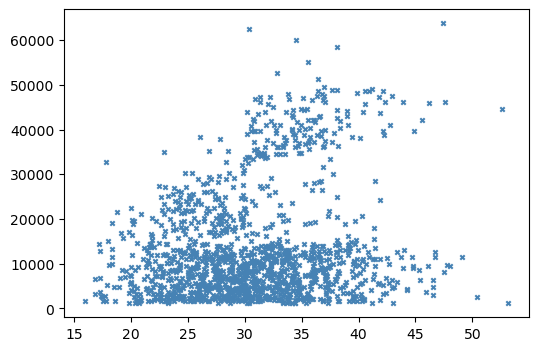

In [12]:
# Let's set up some styles for the graph
plt.style.use('seaborn-v0_8-muted')
plt.figure(figsize=(6, 4), dpi=100)

plt.scatter(x, y, marker = 'x', c = 'steelblue', s = 10)
plt.title

## 4. Linear regression
Let's apply a simple regression model `f(x) = wx + b`. From this we will determine `w` and `b` using gradient descent algorithm. 

### Compute cost function
$$ J(w,b) = \frac{1}{2m} \sum_{i=1}^m (f_{w,b}(x^{(i)}) - y^{(i)})^2 $$
Where:
$$ f_{w,b}(x) = wx + b $$
- **$w$**: Weight (slope)  
- **$b$**: Bias (y-intercept)  
- **$x$**: Input feature 

In [15]:
def cost_function(x, y, w, b):
    """compute cost function
    Args:
    x (ndarray (m, )): feature data
    y (ndarray (m, )): target data
    w, b (float): function parameters

    returns:
    total cost (scalar)
    """
    m = len(x)
    f_wb = w*x + b
    
    total_cost = (1/(2*m)) * np.sum((f_wb - y)**2)
    return total_cost

### Compute gradient function
$$ \frac{\partial}{\partial w} J(w,b) = \frac{1}{m} \sum_{i=1}^m (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} $$
$$ \frac{\partial}{\partial b} J(w,b) = \frac{1}{m} \sum_{i=1}^m (f_{w,b}(x^{(i)}) - y^{(i)}) $$


In [17]:
def gradient_function(x, y, w, b):
    """
    compute the partial derivative of the cost function with respect to w and b
    Args:
    x (ndarray (m, )): feature data
    y (ndarray (m, )): target data
    w, b (float): function parameters

    Returns:
    dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
    dj_db (scalar): The gradient of the cost w.r.t. the parameter b
    """
    m = len(x)
    f_wb = w*x + b

    dj_dw = (1/m) * np.sum((f_wb - y) * x)
    dj_db = (1/m) * np.sum(f_wb - y)

    return dj_dw, dj_db

### Geadient descent
$$ w := w - \alpha \frac{\partial}{\partial w} J(w,b) $$
$$ b := b - \alpha \frac{\partial}{\partial b} J(w,b) $$

In [50]:
def gradient_descent(x, y, w_in, b_in, alpha, iterations, cost_function, gradient_function):
    """  
    Performs gradient descent to fit w,b. Updates w,b by taking 
    iteration gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      iterations (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient

    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    w = w_in
    b = b_in
    j_history = []
    p_history = []

    for i in range(iterations):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db

        j_history.append(cost_function(x, y, w, b))
        p_history.append([w, b])
        if i % math.ceil(iterations/10) == 0:
            print(f"Iteration {i:5}: cost {cost_function(x, y, w, b):0.2e}:dj_dw {dj_dw:0.3e}:"
                 f"dj_db {dj_db:0.3e}:w {w:0.3e}: b {b:0.4e}")

    return w, b, j_history, p_history

In [52]:
w_in = 0
b_in = 0
alpha = 1e-5
iterations = 100000
w_final, b_final, cost, p = gradient_descent(x, y, w_in, b_in, alpha, iterations, 
                                             cost_function, gradient_function)
w_final

Iteration     0: cost 1.60e+08:dj_dw -4.216e+05:dj_db -1.327e+04:w 4.216e+00: b 1.3270e-01
Iteration 10000: cost 7.04e+07:dj_dw 1.400e+00:dj_db -4.463e+01:w 4.307e+02: b 1.7990e+01
Iteration 20000: cost 7.04e+07:dj_dw 1.395e+00:dj_db -4.446e+01:w 4.306e+02: b 2.2444e+01
Iteration 30000: cost 7.04e+07:dj_dw 1.389e+00:dj_db -4.429e+01:w 4.305e+02: b 2.6881e+01
Iteration 40000: cost 7.04e+07:dj_dw 1.384e+00:dj_db -4.412e+01:w 4.303e+02: b 3.1302e+01
Iteration 50000: cost 7.04e+07:dj_dw 1.379e+00:dj_db -4.395e+01:w 4.302e+02: b 3.5705e+01
Iteration 60000: cost 7.04e+07:dj_dw 1.374e+00:dj_db -4.379e+01:w 4.300e+02: b 4.0092e+01
Iteration 70000: cost 7.04e+07:dj_dw 1.369e+00:dj_db -4.362e+01:w 4.299e+02: b 4.4463e+01
Iteration 80000: cost 7.04e+07:dj_dw 1.363e+00:dj_db -4.346e+01:w 4.298e+02: b 4.8817e+01
Iteration 90000: cost 7.04e+07:dj_dw 1.358e+00:dj_db -4.329e+01:w 4.296e+02: b 5.3154e+01


429.4964757323361

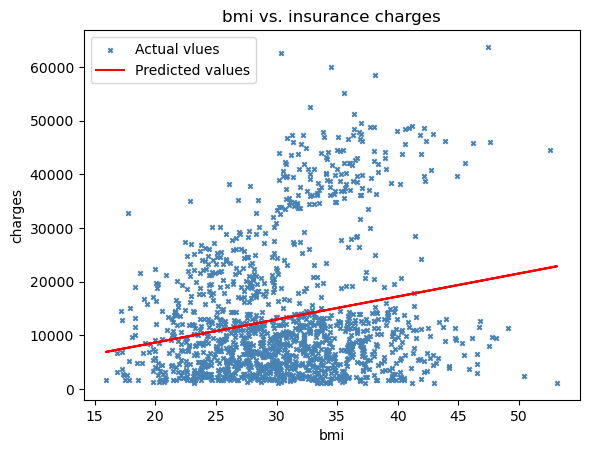

In [73]:
f = w_final * x + b_final
plt.scatter(x, y, marker = 'x', c = 'steelblue', s = 10, label = 'Actual vlues')
plt.plot(x, f, color = 'red', label = 'Predicted values')
plt.title("bmi vs. insurance charges")
plt.xlabel("bmi")
plt.ylabel("charges")
plt.legend()

### Cost versus iterations of gradient descent 

Text(0, 0.5, 'Cost')

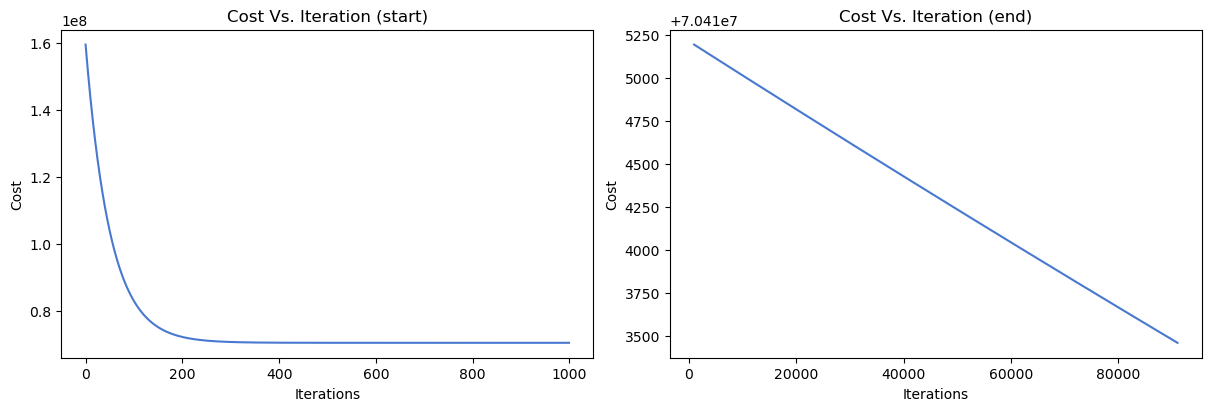

In [66]:
fig, ax = plt.subplots(ncols = 2, constrained_layout=True, figsize=(12,4))
ax[0].plot(cost[:1000])
ax[1].plot(1000 + np.arange(len(cost[10000:])), cost[10000:])
ax[0].set_title("Cost Vs. Iteration (start)")
ax[1].set_title("Cost Vs. Iteration (end)")
ax[0].set_xlabel("Iterations")
ax[1].set_xlabel("Iterations")
ax[0].set_ylabel("Cost")
ax[1].set_ylabel("Cost")

## 5. Predictions

In [83]:
print(f"30 bmi pridicted ${w_final * 30 + b_final:0.1f}")
print(f"25 bmi pridicted ${w_final * 25 + b_final:0.1f}")
print(f"32 bmi pridicted ${w_final * 32 + b_final:0.1f}")

30 bmi pridicted $12942.4
25 bmi pridicted $10794.9
32 bmi pridicted $13801.4
